In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load preprocessed dataset
df = pd.read_csv("C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/data/processed/preprocessed_mutual_funds.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Pick one Scheme_Code to forecast
scheme_code = df['Scheme_Code'].value_counts().idxmax()
print("Selected Scheme:", scheme_code)

scheme_df = df[df['Scheme_Code'] == scheme_code].sort_values("Date")
scheme_df.reset_index(drop=True, inplace=True)


Selected Scheme: 101206


In [9]:
import os
print(os.listdir('C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender//src'))  # This should show 'arima_model.py'

['api.py', 'arima_model.py', 'classifier_model.py', 'data_preprocessing.py', 'lstm_model.py', 'utils.py', '__pycache__']


In [13]:
pip install --upgrade scikit-learn pmdarima

Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45293.960, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45285.960, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45287.959, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45287.959, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45287.002, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45289.960, Time=1.61 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 5.471 seconds

ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4852
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -22640.980
Date:                Tue, 17 Jun 2025   AIC                          45285.960
Time:                        10:37:30   BIC                          45298.933
Sample:                             0   HQIC                       

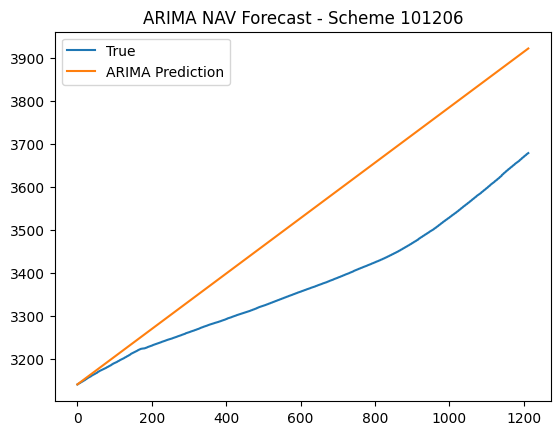

ARIMA MAE: 155.8894
ARIMA RMSE: 179.8273


In [14]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Add src/ to path so Python can find custom module
sys.path.append('C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/src')
from arima_model import run_arima_forecast

scheme_code = 101206 

# Run ARIMA forecast 
arima_preds, arima_true, mae, rmse = run_arima_forecast(df, scheme_code)

# Display plot
plt.plot(arima_true, label='True')
plt.plot(arima_preds, label='ARIMA Prediction')
plt.title(f"ARIMA NAV Forecast - Scheme {scheme_code}")
plt.legend()
plt.show()

# Print metrics
print(f"ARIMA MAE: {mae:.4f}")
print(f"ARIMA RMSE: {rmse:.4f}")


C:\Users\BALA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


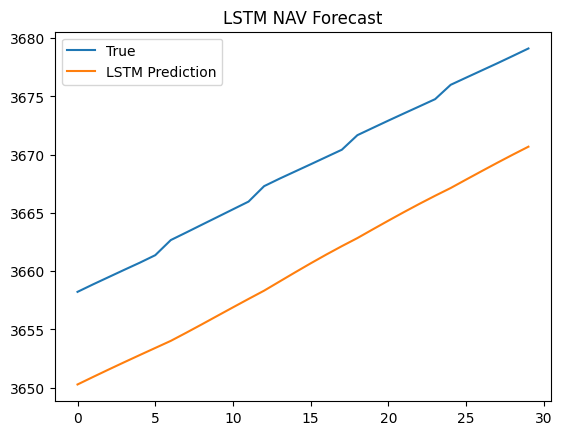

In [15]:
sys.path.append('C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/src')
from lstm_model import run_lstm_forecast

lstm_preds, lstm_true = run_lstm_forecast(scheme_df)
plt.plot(lstm_true, label='True')
plt.plot(lstm_preds, label='LSTM Prediction')
plt.title("LSTM NAV Forecast")
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return {"Model": model_name, "RMSE": rmse, "MAE": mae}

# Evaluate both
arima_metrics = evaluate_model(arima_true, arima_preds, "ARIMA")
lstm_metrics = evaluate_model(lstm_true, lstm_preds, "LSTM")


ARIMA - RMSE: 179.8273, MAE: 155.8894
LSTM - RMSE: 8.4471, MAE: 8.4418


In [21]:
print("Date length: ", len(scheme_df['Date'].iloc[-30:]))
print("LSTM true: ", len(lstm_true))
print("LSTM preds: ", len(lstm_preds))
print("ARIMA preds: ", len(arima_preds))

n = 30  # number of points comparing

preds_df = pd.DataFrame({
    "Date": scheme_df['Date'].iloc[-n:].values,
    "Actual_NAV": lstm_true[-n:],
    "LSTM_Predicted_NAV": lstm_preds[-n:],
    "ARIMA_Predicted_NAV": arima_preds[-n:]  # slice last 30 of ARIMA
})


preds_df.to_csv("C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/data/processed/nav_predictions.csv", index=False)
print("Predictions exported to data/processed/nav_predictions.csv")


Date length:  30
LSTM true:  30
LSTM preds:  30
ARIMA preds:  1213
Predictions exported to data/processed/nav_predictions.csv


In [22]:
import pandas as pd

results_df = pd.DataFrame([arima_metrics, lstm_metrics])
results_df = results_df.sort_values(by="RMSE")

print("Model Performance Leaderboard:")
results_df.reset_index(drop=True, inplace=True)
results_df


Model Performance Leaderboard:


,Model,RMSE,MAE
0,LSTM,8.447141,8.441824
1,ARIMA,179.827264,155.889360
